In [ ]:
# https://www.kaggle.com/code/rajendarkatravath/mobileprice-prediction-optuna

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import scripts.algorithms_class as a

In [3]:
df = pd.read_csv('dataset/Mobile Price Prediction Datatset.csv')
df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [6]:
from ydata_profiling import ProfileReport
ProfileReport(df[['Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power','Price']]).to_file('profile_mobile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
#df.party_ideology1.value_counts()

In [7]:
df.isnull().sum()


Unnamed: 0         0
Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [111]:
NUM = list(df.select_dtypes(include=['int64','float64']).columns)

In [112]:
NUM

['Unnamed: 0',
 'Ratings',
 'RAM',
 'ROM',
 'Mobile_Size',
 'Primary_Cam',
 'Selfi_Cam',
 'Battery_Power',
 'Price']

Unnamed: 0


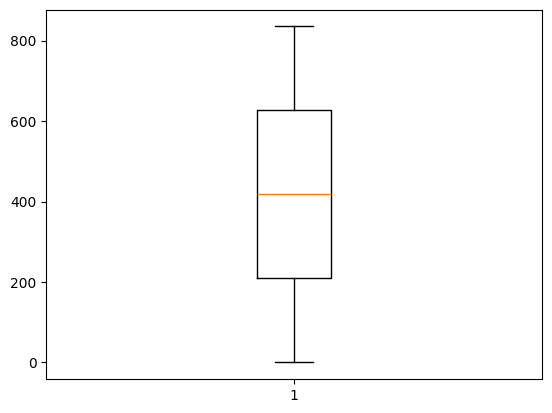

Ratings


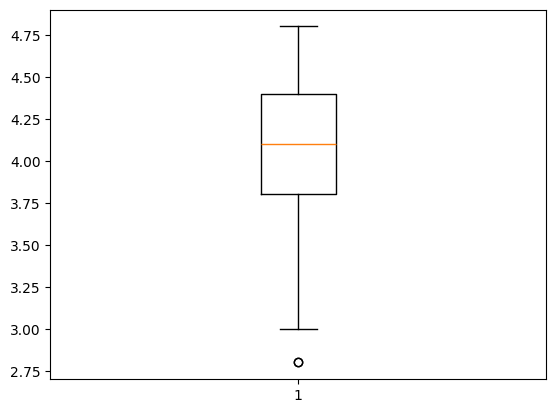

RAM


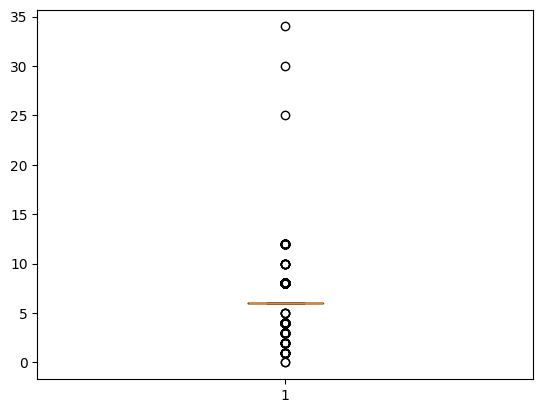

ROM


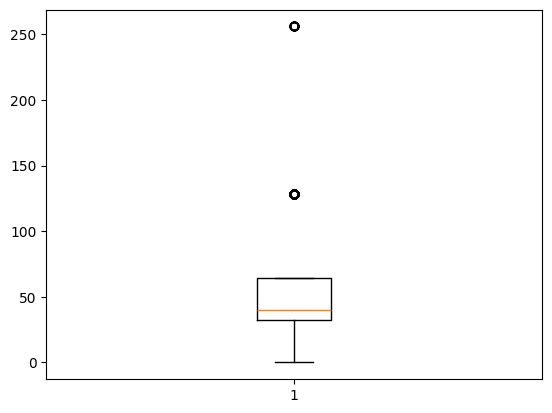

Mobile_Size


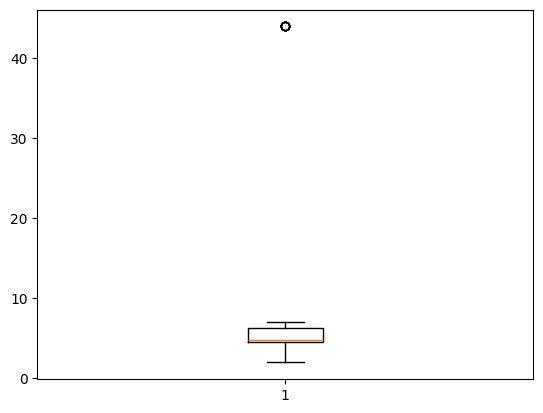

Primary_Cam


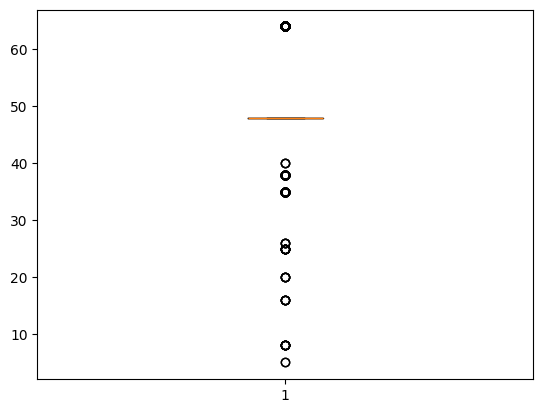

Selfi_Cam


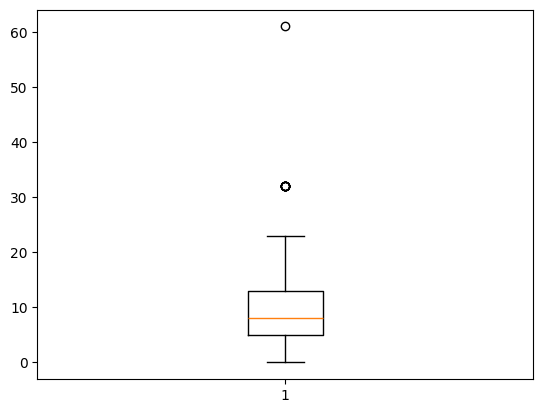

Battery_Power


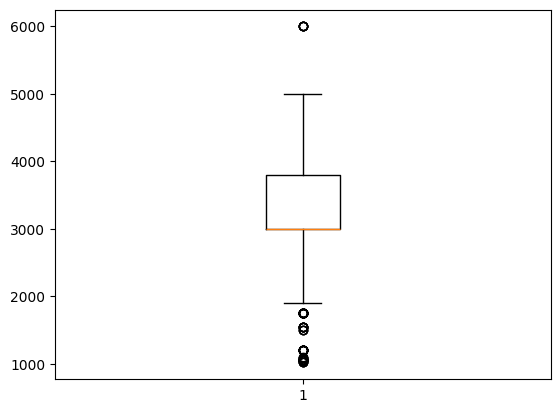

Price


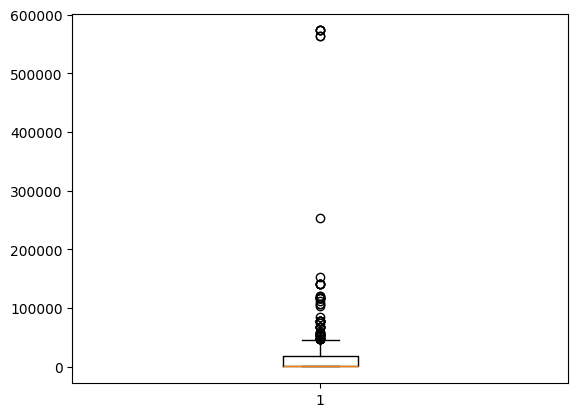

In [113]:
for col in NUM:
    print(col)
    plt.boxplot(df[col].dropna())
    plt.show()


In [146]:
import scripts.algorithms_class as a


In [147]:
df.columns

Index(['Unnamed: 0', 'Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

In [148]:
cols = ['Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power']
target = ['Price']

In [149]:
a.classification(df[cols], df[target], 'RandomForest', 250, 4)


Training for RandomForest...
0.46801871767011205


np.float64(0.46801871767011205)

In [150]:
df['Price_Class'] = 'None'

In [151]:
for index, row in df.iterrows():
    if row.Price < 1000:
      df.loc[index, 'Price_Class'] = '0-1000'
    elif (row.Price > 1000) and (row.Price < 10000):
      df.loc[index, 'Price_Class'] = '1000-10000'
    elif row.Price > 10000:
      df.loc[index, 'Price_Class'] = '10000-60000'

In [152]:
df


,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,Price_Class
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999,10000-60000
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999,10000-60000
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000,10000-60000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999,10000-60000
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999,10000-60000
...,...,...,...,...,...,...,...,...,...,...,...
831,831,Karbonn K24 Plus Pro,3.8,6.0,32.0,4.54,48,12.0,2800,1299,1000-10000
832,832,InFocus POWER 2,4.1,8.0,64.0,4.54,64,NaN,2500,1390,1000-10000
833,833,"Alcatel 5V (Spectrum Blue, 32 )",4.4,3.0,32.0,6.20,48,1.0,3800,9790,1000-10000
834,834,JIVI JV 12M,3.7,10.0,32.0,4.50,64,NaN,3500,799,0-1000


In [154]:
a.classification(df[cols], df['Price_Class'], 'RandomForest', 250, 4)


Training for RandomForest...
0.8814774780044138


np.float64(0.8814774780044138)

In [157]:
cols = ['Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power','Price_Class']

In [158]:
df[cols].to_csv('mobile.csv',index=False)


In [3]:
df = pd.read_csv("dataset/mobile.csv")
name_class = 'Price_Class'
selected_features = ['Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power', name_class]
selected_features_only = ['Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power']
df = df[selected_features]

In [18]:
param = {
    'DecisionTree': 100,
    'LogisticRegression': 1,
    'KNN': 3,
    'RandomForest': 250,
    'AdaBoost': 150,
    'SVC': 1
}

models = ['DecisionTree','LogisticRegression','KNN','RandomForest','AdaBoost','SVC']


In [19]:
param = {
    'DecisionTree': 100,
    'LogisticRegression': 1,
    'KNN': 3,
    'RandomForest': 250,
    'AdaBoost': 150,
    'SVC': 1
}

for m in models:
    a.classification(df[selected_features_only], df[name_class], m, param[m], 4)

Training for DecisionTree...
0.8730314885952215
Training for LogisticRegression...
0.7166503552028867
Training for KNN...
0.81529491393676
Training for RandomForest...
0.8975431406130385
Training for AdaBoost...
0.6669934606506549
Training for SVC...
0.7537471482401658
